# Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [4]:
df=pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


# Exploratory Data Analysis

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

# handling missing values

In [9]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# data visualization 

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

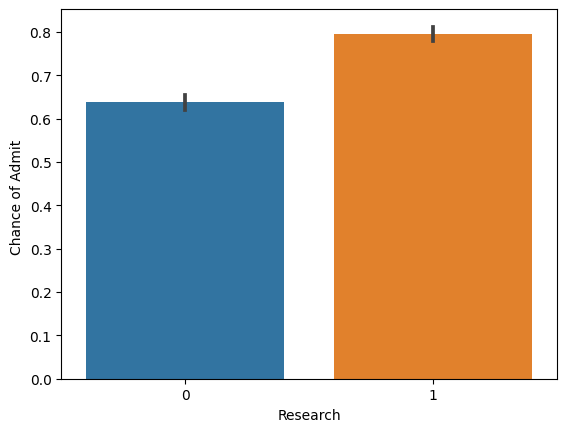

In [10]:
# bar plot
sns.barplot(x='Research',y='Chance of Admit ',data = df)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

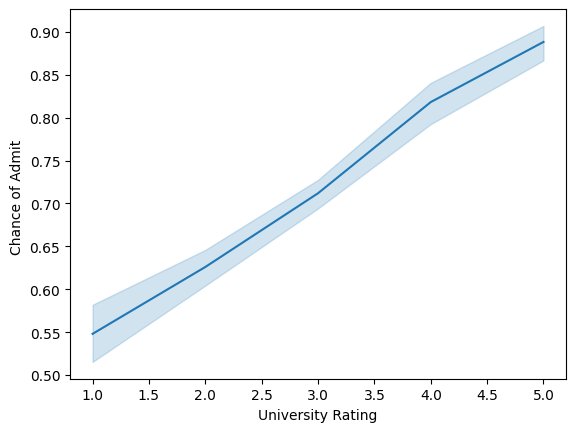

In [11]:
#line plot
sns.lineplot(x='University Rating',y='Chance of Admit ',data = df)

<AxesSubplot:>

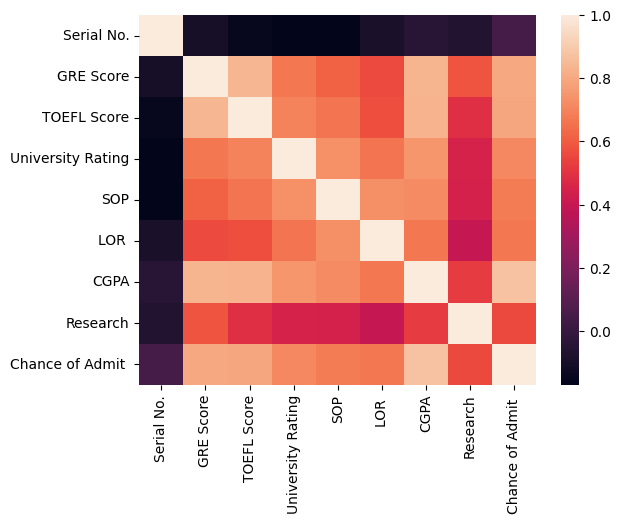

In [12]:
#heatmap
sns.heatmap(df.corr())

# split data into x and y 

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

# Split data into train and test

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(320, 8)
(320,)
(80,)
(80, 8)


In [15]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)

SVR()

In [16]:
y_pred = svr.predict(x_test)
y_pred

array([0.662705  , 0.69376725, 0.77732735, 0.65913292, 0.725129  ,
       0.61659   , 0.70127649, 0.69869277, 0.85246637, 0.86136108,
       0.57572153, 0.83936935, 0.73824101, 0.61498967, 0.75373026,
       0.64093296, 0.67228091, 0.80247604, 0.69158815, 0.7124357 ,
       0.851515  , 0.81866149, 0.61401127, 0.57140062, 0.76555875,
       0.6202097 , 0.52748503, 0.65240588, 0.88195553, 0.68295037,
       0.67344005, 0.76416077, 0.70036639, 0.58262498, 0.75685267,
       0.7717149 , 0.7025096 , 0.79137084, 0.65066856, 0.80584334,
       0.73432139, 0.71027411, 0.70219956, 0.71231756, 0.79707279,
       0.72623123, 0.69288336, 0.6947127 , 0.65216937, 0.63455946,
       0.69127795, 0.78721131, 0.70417247, 0.87281279, 0.68584828,
       0.77744311, 0.81639971, 0.71509266, 0.71583877, 0.72706922,
       0.67445041, 0.56014931, 0.64241378, 0.58860869, 0.78477061,
       0.75498066, 0.7597779 , 0.77205318, 0.78160865, 0.73549959,
       0.60538089, 0.80181292, 0.70652468, 0.64872424, 0.87182

In [17]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.06013583847461792